In [56]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 다중분류

In [8]:
daegu_df = pd.read_csv('C:/Users/jangmark/please/data/deagu.csv')
gwangju_df = pd.read_csv('C:/Users/jangmark/please/data/gwangju.csv')
gyeonggi_df = pd.read_csv('C:/Users/jangmark/please/data/gyeonggi.csv')
gyungju_df = pd.read_csv('C:/Users/jangmark/please/data/gyungju.csv')
jeju_df = pd.read_csv('C:/Users/jangmark/please/data/jeju.csv')
seoul_df = pd.read_csv('C:/Users/jangmark/please/data/seoul.csv')
ulsan_df = pd.read_csv('C:/Users/jangmark/please/data/ulsan.csv')
busan_df = pd.read_csv('C:/Users/jangmark/please/data/sample_부산3.csv')

In [9]:
total_df = pd.concat([daegu_df, gwangju_df, gyeonggi_df, gyungju_df,jeju_df,seoul_df,ulsan_df,busan_df],axis=0,ignore_index=True)

In [12]:
total_df = total_df.drop(['Unnamed: 0','리뷰자 평균 평점','리뷰자 누적 리뷰 개수','영업 시간','이미지url','가게명','가게 주소','메뉴','카카오 url'],axis=1)

In [14]:
total_df.to_csv('total.csv')

In [16]:
total_df.isnull().sum()

리뷰    30840
별점        0
dtype: int64

In [17]:
del_row = total_df.dropna()
del_row

,리뷰,별점
0,수성못 옆이라서 분위기는 좋음. 근데 내 돈주고 먹지는 않을듯,3
1,음식 리필속도도 느리고 직원아주머니 불친절대기하면서까지 먹을게못됨어묵 다 식어서 뻣...,2
2,스시뷔페,5
3,스시뷔페,1
4,네,5
...,...,...
198278,아점으로 먹기 딱 좋은 곳..음식 수준은 다 괜찮고 가격도 괜찮은 편. 이케아 근처...,5
198280,비추입니다.느끼한거 좋아하는데도 짜고 느끼하니 안주같은 느낌입니다.감자튀김은 양은 ...,2
198281,"음식 퀄리티 좋고가구, 인테리어 고급짐.다만 송정 이 곳 상권치고 매우 비쌈.",3
198282,맛은 무난했으나 많이 느끼했고 서비스가 정말 별로입니다.제가 앞접시 좀 달라고 했는...,2


In [19]:
del_row.isnull().sum()

리뷰    0
별점    0
dtype: int64

In [20]:
del_row

,리뷰,별점
0,수성못 옆이라서 분위기는 좋음. 근데 내 돈주고 먹지는 않을듯,3
1,음식 리필속도도 느리고 직원아주머니 불친절대기하면서까지 먹을게못됨어묵 다 식어서 뻣...,2
2,스시뷔페,5
3,스시뷔페,1
4,네,5
...,...,...
198278,아점으로 먹기 딱 좋은 곳..음식 수준은 다 괜찮고 가격도 괜찮은 편. 이케아 근처...,5
198280,비추입니다.느끼한거 좋아하는데도 짜고 느끼하니 안주같은 느낌입니다.감자튀김은 양은 ...,2
198281,"음식 퀄리티 좋고가구, 인테리어 고급짐.다만 송정 이 곳 상권치고 매우 비쌈.",3
198282,맛은 무난했으나 많이 느끼했고 서비스가 정말 별로입니다.제가 앞접시 좀 달라고 했는...,2


In [145]:
del_row['리뷰'].duplicated().sum()

2561

In [146]:
del_row.drop_duplicates(subset=['리뷰'], inplace=True)

In [147]:
del_row['리뷰'].duplicated().sum()

0

In [148]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
from nltk import FreqDist
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk import FreqDist

# 한글 정규식

# Cast the '리뷰' column to strings
del_row['리뷰'] = del_row['리뷰'].astype(str)

# Define a regular expression pattern
pattern = re.compile("[^가-힣 ]") # 한글을 제외한 모든 글자 뺌

# Apply the pattern substitution to the '리뷰' column
del_row['리뷰'] = del_row['리뷰'].apply(lambda x: pattern.sub('', x))

In [25]:
from tqdm import tqdm
for i in tqdm(range(len(del_row))):
  try:
    result_df = spell_checker.check(del_row['리뷰'][i])
    del_row['리뷰'][i] = result_df.as_dict()['checked']
  except:
    pass

100%|██████████| 159981/159981 [00:00<00:00, 343507.51it/s]


In [149]:
stop_word = pd.read_csv('C:/Users/jangmark/please/03_29/stopwords_kor.txt')
stop_word

,stop
0,않다
1,되어다
2,되다
3,하다
4,어떻다
...,...
1284,휘익
1285,휴
1286,흐흐
1287,흥


In [30]:
stopwords = stop_word['stop'].tolist()
okt = Okt()
Okt_list = []
for sentence in tqdm(del_row['리뷰']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    Okt_list.append(stopwords_removed_sentence)

100%|██████████| 159981/159981 [27:22<00:00, 97.37it/s]   


In [150]:
result = []
for okt_review in Okt_list:
    result.append(' '.join(okt_review))

In [151]:
review_df = pd.DataFrame(result)

In [152]:
merged_df = pd.concat([review_df,total_df], axis=1, join='inner')

In [153]:
merged_df

,0,리뷰,별점
0,수성 못 이라서 분위기 좋다 근데 돈 주다 먹다,수성못 옆이라서 분위기는 좋음. 근데 내 돈주고 먹지는 않을듯,3
1,음식 리필 속도 느리다 직원 아주머니 불친절 대다 먹다 못 어묵 식다 뻣뻣하다 국도 다식,음식 리필속도도 느리고 직원아주머니 불친절대기하면서까지 먹을게못됨어묵 다 식어서 뻣...,2
2,스시 뷔페,스시뷔페,5
3,,스시뷔페,1
4,맛 없다 초밥 만들다 직원 수다 고객 응대 정말 아니다 두 번은 가지,네,5
...,...,...,...
159976,점 먹기 좋다 음식 수준 괜찮다 가격 괜찮다 편 이케아 근처 제일 수준 높다 맛집 ...,"반찬 다 먹어가고 나서야 밥이 나와요...; 그리고 솔직히 밥만 맛있고 제육볶음, ...",3
159977,비추다 느끼하다 좋아하다 짜다 느끼하다 안주 느낌 감자 튀김 양은 많다 파삭 유명 ...,개별로 주문도 늦게 나오고 매뉴도 특출나게 맛있는지 모르겠음 진심 자리값,1
159978,음식 퀄리티 좋다 인테리어 고급 지다 송정 상권 치고 매우 비싸다,맛도 별로... 특히 서비스가 진짜 별로에요...,1
159979,맛 무난 많이 느끼하다 서비스 정말 별로 앞 접시 달라 휴지 올려놓다 접시 가리키다...,솔직하게 맛! 집은 아니지만 친절한 집이였습니다.,4


In [154]:
result_df = merged_df.drop(['리뷰'],axis=1)

In [155]:
result_df.rename(columns = {0:'리뷰'},inplace=True)

In [156]:
total_data = result_df.rename(columns = {'리뷰':'reviews','별점':'ratings'})

In [158]:
total_data

,reviews,ratings
0,수성 못 이라서 분위기 좋다 근데 돈 주다 먹다,3
1,음식 리필 속도 느리다 직원 아주머니 불친절 대다 먹다 못 어묵 식다 뻣뻣하다 국도 다식,2
2,스시 뷔페,5
3,,1
4,맛 없다 초밥 만들다 직원 수다 고객 응대 정말 아니다 두 번은 가지,5
...,...,...
159976,점 먹기 좋다 음식 수준 괜찮다 가격 괜찮다 편 이케아 근처 제일 수준 높다 맛집 ...,3
159977,비추다 느끼하다 좋아하다 짜다 느끼하다 안주 느낌 감자 튀김 양은 많다 파삭 유명 ...,1
159978,음식 퀄리티 좋다 인테리어 고급 지다 송정 상권 치고 매우 비싸다,1
159979,맛 무난 많이 느끼하다 서비스 정말 별로 앞 접시 달라 휴지 올려놓다 접시 가리키다...,4


In [142]:
total_data.to_csv('total.csv')

In [ ]:
# 아래에서 패딩과 적절한 단어수 완료된 상태.

import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# load the data

reviews = total_data['reviews']
labels = total_data['ratings']

# prepare the data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=60)

one_hot_labels = to_categorical(labels - 1)

# build the model
model = Sequential()
model.add(Embedding(5000, 128, input_length=60))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(padded_sequences, one_hot_labels, epochs=5, batch_size=16, validation_split=0.2)

In [ ]:
new_reviews = ['수성 못 이라서 분위기 좋다 근데 돈 주다 먹다',
 '음식 리필 속도 느리다 직원 아주머니 불친절 대다 먹다 못 어묵 식다 뻣뻣하다 국도 다식',
 '스시 뷔페',
 '맛 없다 초밥 만들다 직원 수다 고객 응대 정말 아니다 두 번은 가지',
 '기준 작년 대비 천원 가격 인상 인 원 메뉴 사시미 추가 때문 가격 인상 이라 붙다 한치 회 새롭다 두다 천원 인상방문 의사 없다',
 '소문나다 잔치 집 물다 없다 초밥 은 쿠우 쿠우 대 동 소이 외 음식 은 결혼식 뷔페 보다 못 걸 구태 줄 서서 먹다',
 '기다리다 은 점점 길어지다 음식 은 점점 별로 임',
 '리필 빠르다 음식 깔끔하다 차림',
 '굳이 갈다 이유 없다',
 '전화 분 째 통화 중 인 이유 설명 요',
 '쓰레기']

new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded_sequences = pad_sequences(new_sequences, maxlen=50)
predictions = model.predict(new_padded_sequences)
predicted_labels = np.argmax(predictions, axis=1) + 1
print(predicted_labels)

# 긍정 vs 부정 이중분류 => 안씀

In [ ]:
이중 분류
total_data['label'] = np.select([total_df.ratings > 4], [1], default=0)
total_data[:5]

In [160]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(5, 153759, 2)

In [161]:
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 153759


In [162]:
print(total_data.isnull().values.any())

False


In [163]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 115319
테스트용 리뷰의 개수 : 38440


<AxesSubplot: >

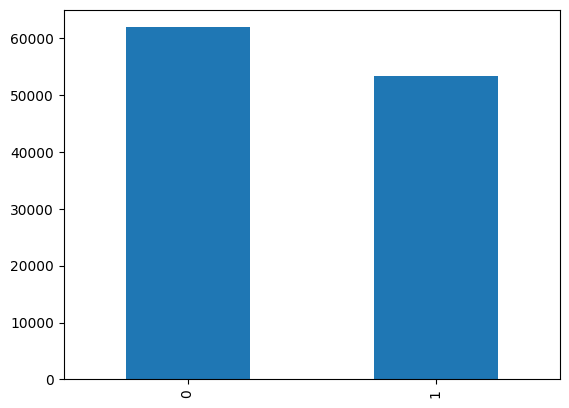

In [164]:
train_data['label'].value_counts().plot(kind = 'bar')

In [165]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

reviews    1
ratings    0
label      0
dtype: int64


In [166]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 38440


In [81]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^가-힣 ]","") # 정규 표현식 수행
test_data['reviews'] = test_data['reviews'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 38440


In [168]:
# 단어와 길이 분포 확인
X_test = []
for sentence in tqdm(test_data['reviews']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 38440/38440 [03:20<00:00, 191.44it/s]


In [169]:
X_train = []
for sentence in tqdm(train_data['reviews']):
    if isinstance(sentence, float) and np.isnan(sentence):
        continue
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 115319/115319 [11:29<00:00, 167.18it/s]


In [170]:
print(X_train[:3])

[['불쇼', '보다', '가세'], ['위생', '별로', '친절', '별로', '맛', '좋다', '재', '방문', '의사'], ['주', '문후', '분', '기다리다', '반찬', '안', '나오다', '나오다', '물어보다', '주문', '안', '들어가다', '상태', '그렇다', '올라가다', '기다리다', '함', '확인', '해보다', '이제', '불', '올', '리다', '준비', '중사', '과는', '안', '변명', '끝', '사과', '안', '들리다', '빼다', '오다', '누가', '들다', '잘몬한줄', '알다', '차다', '대단하다', '번창', '꼭']]


In [171]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [172]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 34879
등장 빈도가 2번 이하인 희귀 단어의 수: 18781
단어 집합에서 희귀 단어의 비율: 53.84615384615385
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.0675653229472342


In [173]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 16099


In [174]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [175]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [99]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [176]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

115188
115189


리뷰의 최대 길이 : 498
리뷰의 평균 길이 : 18.459718026183282


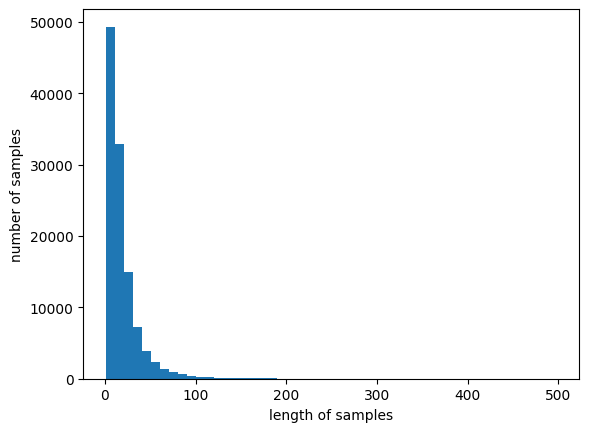

In [177]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [178]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [179]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 96.147168107789


In [180]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)